In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
#!pip install pyMechkar

In [2]:
bike = pd.read_csv("C:/Users/Xnes/DataScience/ML/kaggle challenge/train.csv")
bike.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600

In [104]:
biketest=pd.read_csv("C:/Users/Xnes/DataScience/ML/kaggle challenge/test.csv")
biketest.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0  366       1     1        0        0           0           1  0.370000   
1  367       1     1        1        1           0           1  0.273043   
2  368       1     1        0        2           1           1  0.150000   
3  369       1     1        0        3           1           2  0.107500   
4  370       1     1        0        4           1           1  0.265833   

      atemp       hum  windspeed  seasonality  
0  0.375621  0.692500   0.192167  -139.766280  
1  0.252304  0.381304   0.329665   224.087059  
2  0.126275  0.441250   0.365671    45.766038  
3  0.119337  0.414583   0.184700    -0.828059  
4  0.278412  0.524167   0.129987  -155.685003

In [3]:
bike.dtypes 

id              int64
season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [4]:
bike.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [5]:
#Time Series dont work on categories we need to leave it numeric
#bike.season <- pd.factorize(bike.season)
#bike.mnth <- pd.factorize(train_num.mnth)
#bike.holiday <- pd.factorize(train_num.holiday)
#bike.weekday <- pd.factorize(train_num.weekday)
#bike.workingday <- pd.factorize(train_num.weathersit)
#bike.weathersit <- pd.factorize(train_num.mnth)

In [6]:
bike.describe()

id      season        mnth     holiday     weekday  workingday  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   183.000000    2.498630    6.526027    0.027397    3.008219    0.684932   
std    105.510663    1.110946    3.452584    0.163462    2.006155    0.465181   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     92.000000    2.000000    4.000000    0.000000    1.000000    0.000000   
50%    183.000000    3.000000    7.000000    0.000000    3.000000    1.000000   
75%    274.000000    3.000000   10.000000    0.000000    5.000000    1.000000   
max    365.000000    4.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  365.000000  365.000000  365.000000  365.000000  365.000000   365.000000  
mean     1.421918    0.486665    0.466835    0.643665    0.191403  3405.761644  
std      0.571831    0.189596    0.168836    0.148744    0.076890  1378.753666  
min      1.000000    0.059130    0.079070    0.000000    0.022392   431.000000  
25%      1.000000    0.325000    0.321954    0.538333    0.135583  2132.000000  
50%      1.000000    0.479167    0.472846    0.647500    0.186900  3740.000000  
75%      2.000000    0.656667    0.612379    0.742083    0.235075  4586.000000  
max      3.000000    0.849167    0.840896    0.972500    0.507463  6043.000000

C:\Users\Xnes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


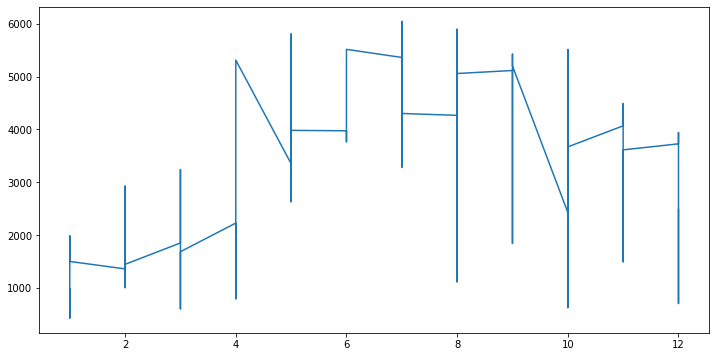

In [3]:
plt.figure(figsize=(12,6))
bike.plt = plt.plot(bike.mnth,bike.cnt)

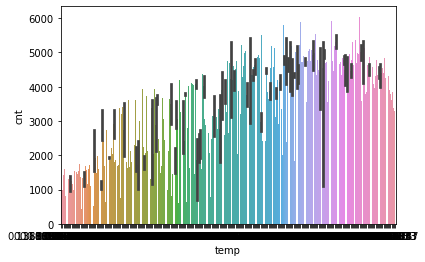

In [4]:
sns.barplot(bike.temp,bike.cnt)

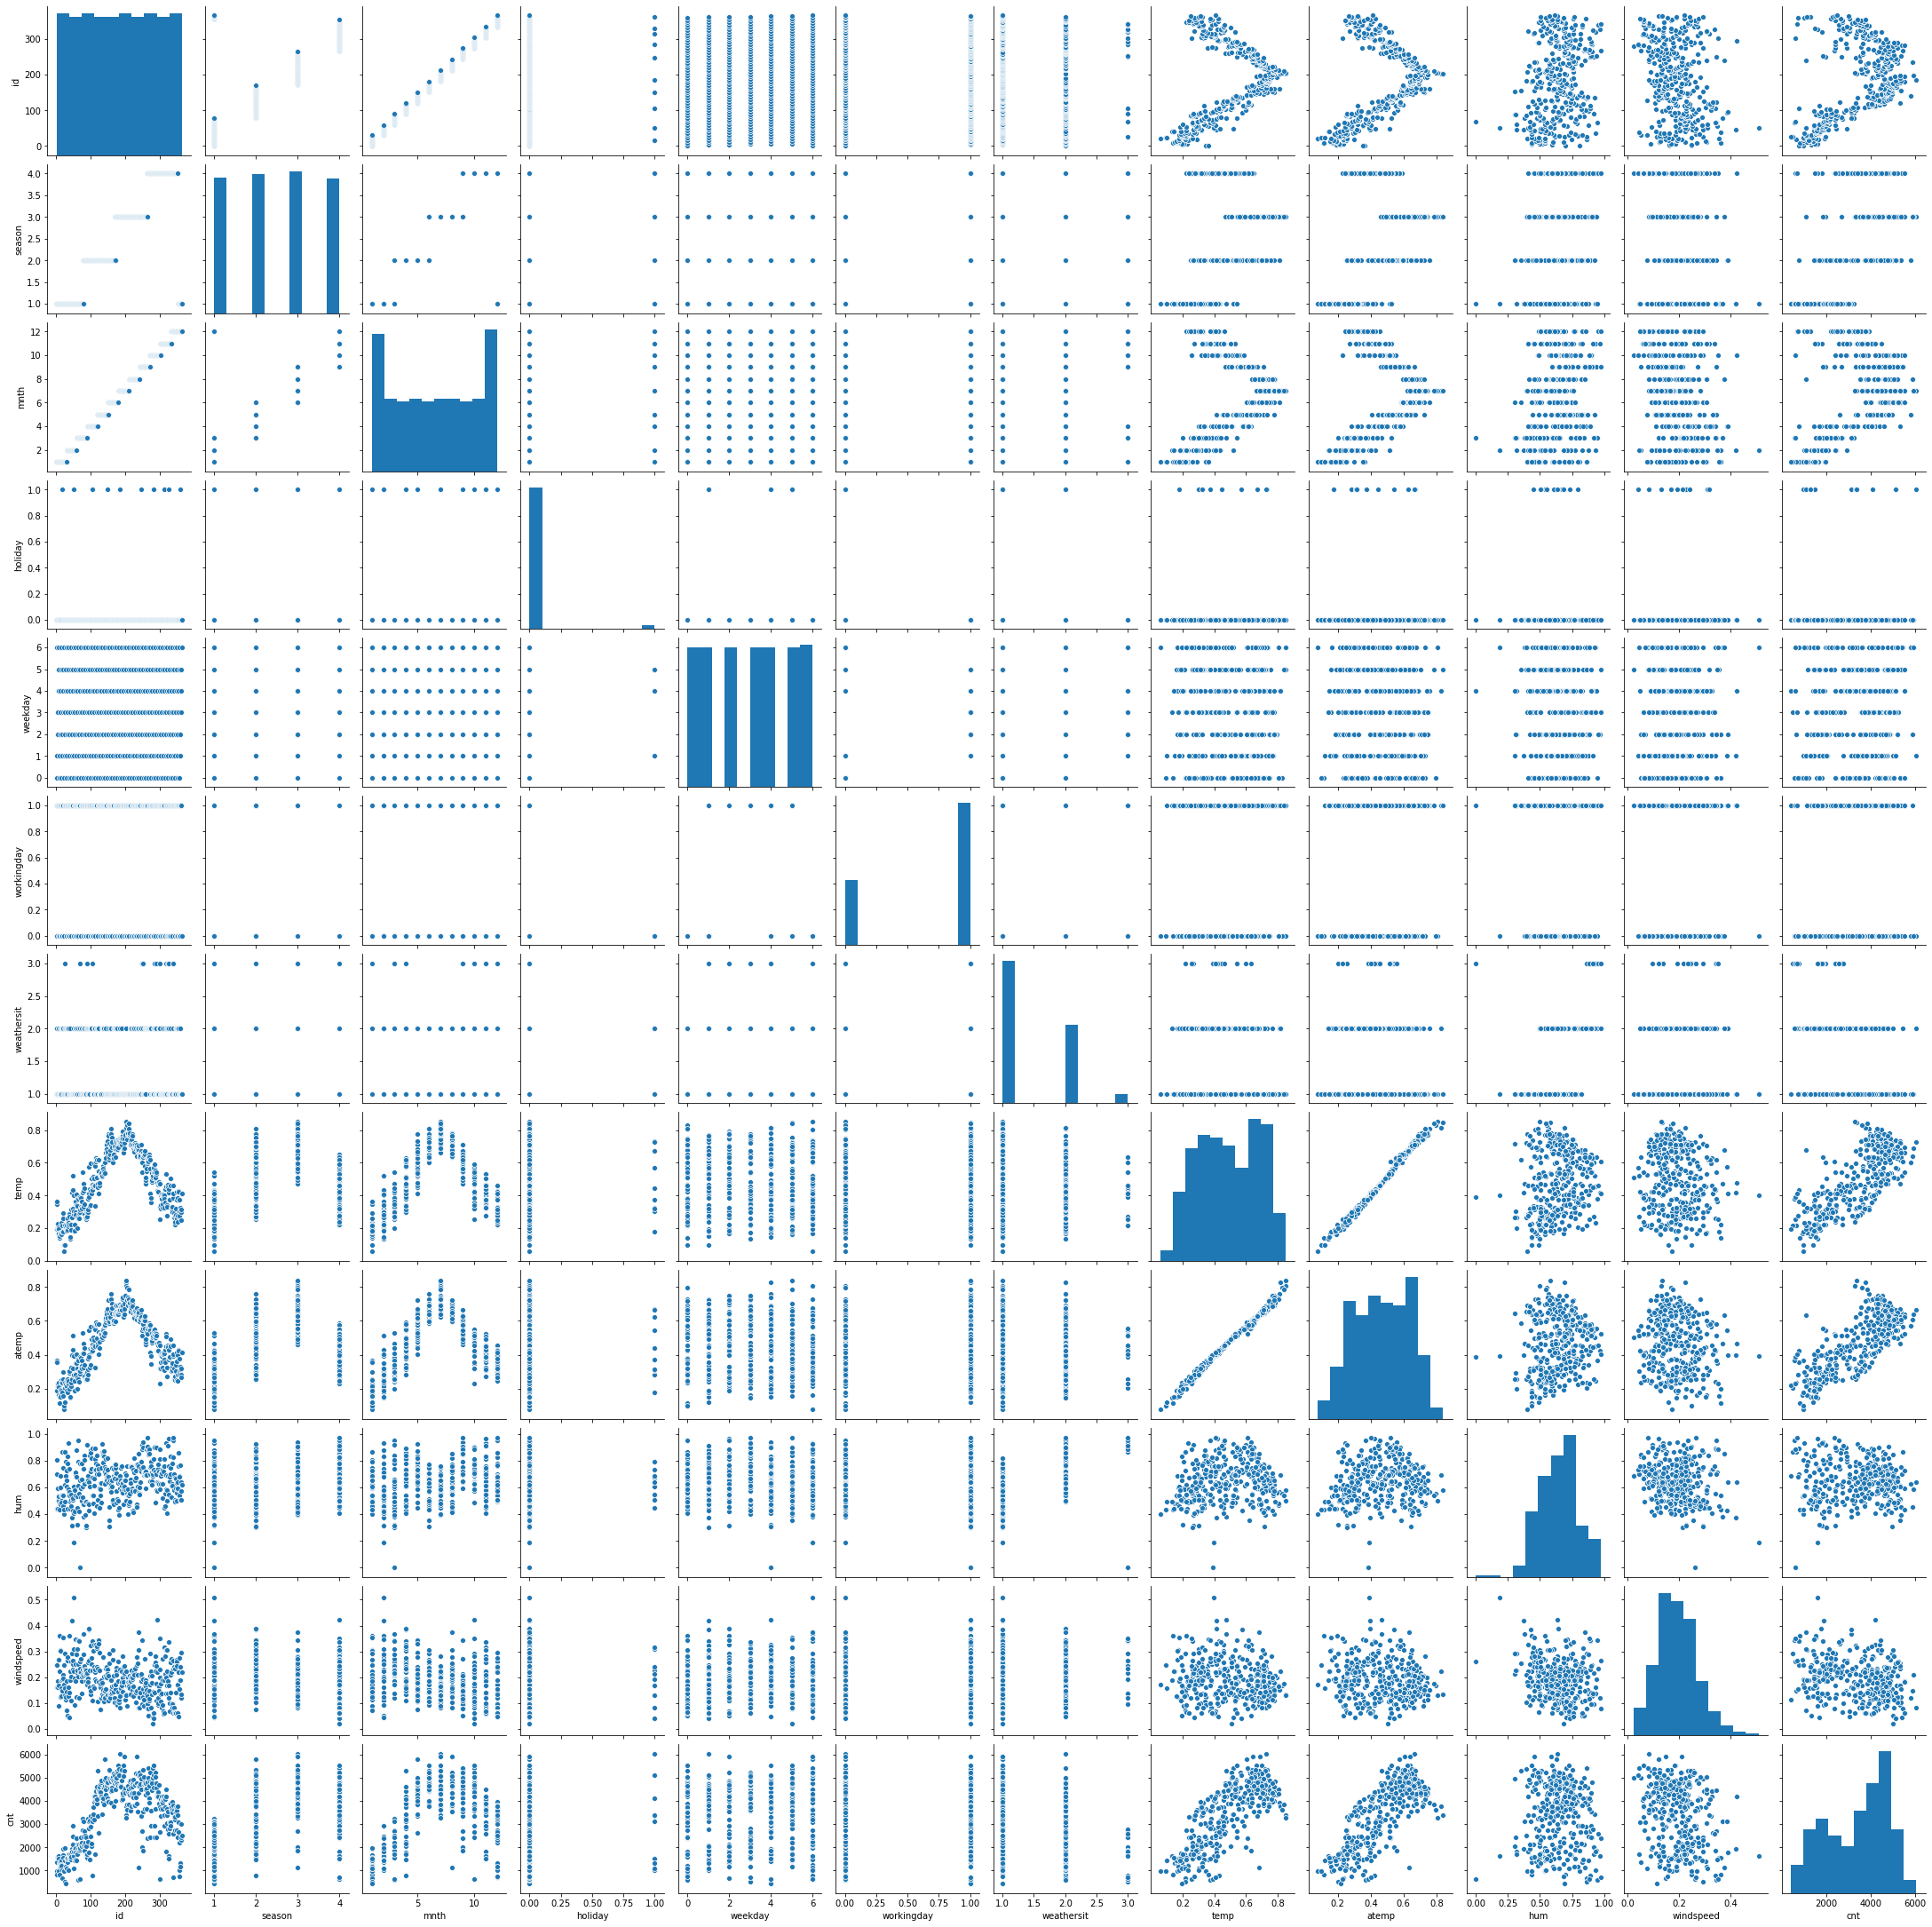

In [9]:
sns.pairplot(bike)

In [7]:
from pyMechkar.analysis import train_test, Table1

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
nv = ['season','mnth','holiday','weekday','workingday','weathersit','temp','hum','windspeed']
yv = 'cnt'

In [107]:
X = bike.loc[:,nv]
y = bike.cnt

In [8]:
X.head()

season  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
0       1     1        0        6           0           2  0.344167  0.805833   
1       1     1        0        0           0           2  0.363478  0.696087   
2       1     1        0        1           1           1  0.196364  0.437273   
3       1     1        0        2           1           1  0.200000  0.590435   
4       1     1        0        3           1           1  0.226957  0.436957   

   windspeed  
0   0.160446  
1   0.248539  
2   0.248309  
3   0.160296  
4   0.186900

In [9]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)


In [11]:
X_train.head()

season  mnth  holiday  weekday  workingday  weathersit      temp  \
223       3     8        0        5           1           1  0.708333   
197       3     7        0        0           0           1  0.719167   
138       2     5        0        4           1           2  0.530833   
14        1     1        0        6           0           2  0.233333   
23        1     1        0        1           1           1  0.097391   

          hum  windspeed  
223  0.415000   0.125621  
197  0.604167   0.245033  
138  0.829583   0.108213  
14   0.498750   0.157963  
23   0.491739   0.158330

In [12]:
y_train.head()

223    4905
197    5302
138    4575
14     1248
23     1416
Name: cnt, dtype: int64

In [13]:
X_test.head()

season  mnth  holiday  weekday  workingday  weathersit      temp  \
354       1    12        0        3           1           2  0.428333   
185       3     7        0        2           1           1  0.746667   
167       2     6        0        5           1           1  0.649167   
175       3     6        0        6           0           1  0.695000   
314       4    11        1        5           0           1  0.324167   

          hum  windspeed  
354  0.858333   0.221400  
185  0.590417   0.126258  
167  0.735833   0.143029  
175  0.483333   0.209571  
314  0.446250   0.314675

In [14]:
y_test.head()

354    2660
185    4665
167    4844
175    5202
314    3368
Name: cnt, dtype: int64

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 9)
(110, 9)
(255,)
(110,)


id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0  366       1     1        0        0           0           1  0.370000   
1  367       1     1        1        1           0           1  0.273043   
2  368       1     1        0        2           1           1  0.150000   
3  369       1     1        0        3           1           2  0.107500   
4  370       1     1        0        4           1           1  0.265833   

      atemp       hum  windspeed  seasonality  
0  0.375621  0.692500   0.192167  -139.766280  
1  0.252304  0.381304   0.329665   224.087059  
2  0.126275  0.441250   0.365671    45.766038  
3  0.119337  0.414583   0.184700    -0.828059  
4  0.278412  0.524167   0.129987  -155.685003

In [87]:
biketest=biketest.loc[:,nv]
biketest.head()

season  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
0       1     1        0        0           0           1  0.370000  0.692500   
1       1     1        1        1           0           1  0.273043  0.381304   
2       1     1        0        2           1           1  0.150000  0.441250   
3       1     1        0        3           1           2  0.107500  0.414583   
4       1     1        0        4           1           1  0.265833  0.524167   

   windspeed  
0   0.192167  
1   0.329665  
2   0.365671  
3   0.184700  
4   0.129987

In [18]:
print(biketest.shape)

(366, 9)


### Linear Model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(X_train,y_train)
pred_tr = mod1.predict(X_train)

pred_ts = mod1.predict(X_test)

In [15]:
print('r^2 score: %f' % r2_score(y_train,pred_tr))
print('MAE: %f' % mean_absolute_error(y_train,pred_tr))

print('r^2 score: %f' % r2_score(y_test,pred_ts))
print('MAE: %f' % mean_absolute_error(y_test,pred_ts))

r^2 score: 0.756605
MAE: 519.888702
r^2 score: 0.747915
MAE: 505.722284


In [16]:
res = pd.DataFrame([{'model':'Linear Regression - Baseline',
                     'Train R^2':r2_score(y_train,pred_tr),'Train MAE':mean_absolute_error(y_train,pred_tr),
                     'Test R^2':r2_score(y_test,pred_ts),'Test MAE':mean_absolute_error(y_test,pred_ts)}])
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284

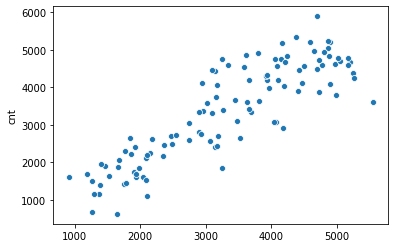

In [17]:
sns.scatterplot(pred_ts, y_test)

### Decision Trees


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
lr = DecisionTreeRegressor()
mod2 = lr.fit(X_train,y_train)
pred2_tr = mod2.predict(X_train)

pred2_ts = mod2.predict(X_test)

In [20]:
res = res.append({'model':'Decision Tree',
                  'Train R^2':r2_score(y_train,pred2_tr),'Train MAE':mean_absolute_error(y_train,pred2_tr),
                  'Test R^2':r2_score(y_test,pred2_ts),'Test MAE':mean_absolute_error(y_test,pred2_ts)
                 },ignore_index=True)
                 
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284
1                 Decision Tree   1.000000    0.000000  0.733500  479.100000

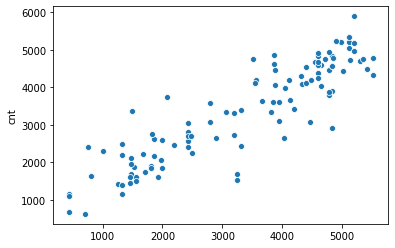

In [21]:
sns.scatterplot(pred2_ts, y_test)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
lr = RandomForestRegressor()
mod3 = lr.fit(X_train,y_train)
pred3_tr = mod3.predict(X_train)

pred3_ts = mod3.predict(X_test)

In [24]:
res = res.append({'model':'Random Forest',
                  'Train R^2':r2_score(y_train,pred3_tr),'Train MAE':mean_absolute_error(y_train,pred3_tr),
                  'Test R^2':r2_score(y_test,pred3_ts),'Test MAE':mean_absolute_error(y_test,pred3_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284
1                 Decision Tree   1.000000    0.000000  0.733500  479.100000
2                 Random Forest   0.977364  148.686314  0.878525  331.294273

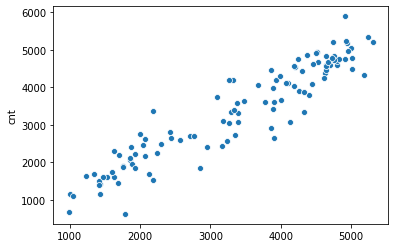

In [25]:
sns.scatterplot(pred3_ts, y_test)

### AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostRegressor

In [27]:
lr = AdaBoostRegressor()
mod4 = lr.fit(X_train,y_train)
pred4_tr = mod4.predict(X_train)

pred4_ts = mod4.predict(X_test)

In [28]:
res = res.append({'model':'AdaBoost',
                  'Train R^2':r2_score(y_train,pred4_tr),'Train MAE':mean_absolute_error(y_train,pred4_tr),
                  'Test R^2':r2_score(y_test,pred4_ts),'Test MAE':mean_absolute_error(y_test,pred4_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284
1                 Decision Tree   1.000000    0.000000  0.733500  479.100000
2                 Random Forest   0.977364  148.686314  0.878525  331.294273
3                      AdaBoost   0.881485  401.328520  0.841104  408.322786

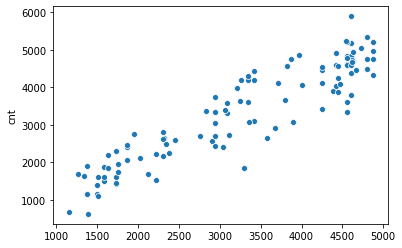

In [29]:
sns.scatterplot(pred4_ts, y_test)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
lr = GradientBoostingRegressor()
mod5 = lr.fit(X_train,y_train)
pred5_tr = mod5.predict(X_train)

pred5_ts = mod5.predict(X_test)

In [32]:
res = res.append({'model':'Gradient Boosting Machine',
                  'Train R^2':r2_score(y_train,pred5_tr),'Train MAE':mean_absolute_error(y_train,pred5_tr),
                  'Test R^2':r2_score(y_test,pred5_ts),'Test MAE':mean_absolute_error(y_test,pred5_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284
1                 Decision Tree   1.000000    0.000000  0.733500  479.100000
2                 Random Forest   0.977364  148.686314  0.878525  331.294273
3                      AdaBoost   0.881485  401.328520  0.841104  408.322786
4     Gradient Boosting Machine   0.971990  183.098505  0.875946  352.382960

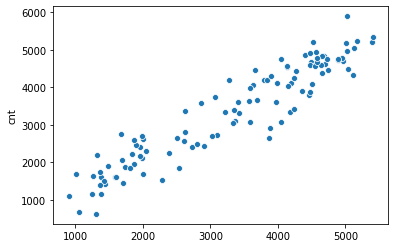

In [33]:
sns.scatterplot(pred5_ts, y_test)

In [34]:
pred_ts = mod4.predict(biketest)
pred_ts

array([1496.16      , 1496.16      , 1496.16      , 1504.63829787,
       1724.37037037, 1866.        , 2077.72413793, 1767.25      ,
       1496.16      , 1767.25      , 1356.20833333, 1496.16      ,
       1582.85714286, 1530.05172414, 1496.16      , 1496.16      ,
       1368.75757576, 1530.05172414, 1504.63829787, 1582.85714286,
       1180.125     , 1157.85964912, 1085.57142857, 1530.05172414,
       1629.3968254 , 1858.35483871, 2022.31372549, 1896.5       ,
       1582.85714286, 1530.05172414, 1753.7826087 , 3622.625     ,
       2022.31372549, 1886.20754717, 1465.28571429, 1332.14285714,
       1629.3968254 , 1858.35483871, 1465.11904762, 1585.85365854,
       1858.35483871, 1101.77142857, 1506.95      , 1582.85714286,
       1858.35483871, 1824.36666667, 1858.35483871, 1886.20754717,
       1897.875     , 1585.85365854, 1585.85365854, 1629.3968254 ,
       2033.58024691, 2799.27868852, 2022.31372549, 1629.3968254 ,
       1629.3968254 , 1753.7826087 , 1824.36666667, 1504.63829

In [52]:
df_test1=pd.DataFrame(pred_ts,columns=['cnt'])
df_test1
#df_test1['id']=range(367,733)
df_test1.insert(0,'id',range(366,732),False)
df_test1

id          cnt
0    366  1496.160000
1    367  1496.160000
2    368  1496.160000
3    369  1504.638298
4    370  1724.370370
..   ...          ...
361  727  1585.853659
362  728  1858.354839
363  729  1496.160000
364  730  1585.853659
365  731  1629.396825

[366 rows x 2 columns]

In [53]:
df_test1.to_csv("results_AdaBoost_Jennie_14112020.csv",index=False)

### How can we improve this model ?

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

In [55]:
vn2=['cnt','season','mnth','holiday','weekday','workingday','weathersit','temp','hum','windspeed','atemp']

### Check for Trends in Data

In [56]:
def plotTrend(data):
    ### check daily, weekly and monthly mean voltage
    fig, ax = plt.subplots(figsize = (12,6))

    ## ploting daily voltage
    daily = data.rolling(window=1, center=True).mean()
    ax.plot(daily, marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

    ## ploting weekly voltage
    weekly = data.rolling(window=7, center=True).mean()
    ax.plot(weekly, linewidth=2, label='Weekly')

    ## ploting monthly voltage
    montly = data.rolling(window=30, center=True).mean()
    ax.plot(montly, linewidth=3, color='0.2', label='Trend (Monthly)')

    ### enhance the plot
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Date')
    #ax.set_ylabel('Voltage')
    ax.set_title('Trends')

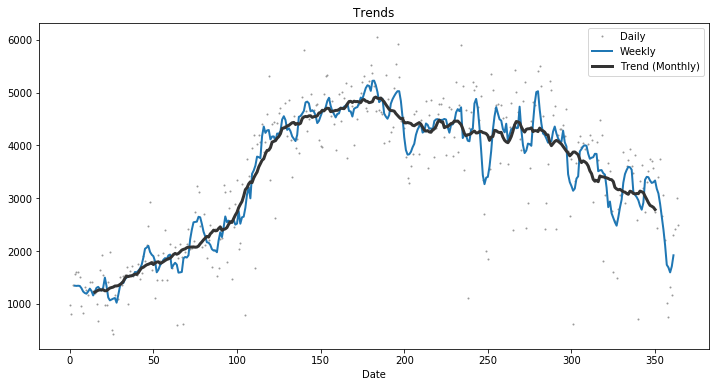

In [57]:
plotTrend(bike['cnt'])

### TS Differenciation

In [58]:
firstorder = bike[vn2].diff()

In [59]:
firstorder.head()

cnt  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0    NaN     NaN   NaN      NaN      NaN         NaN         NaN       NaN   
1 -184.0     0.0   0.0      0.0     -6.0         0.0         0.0  0.019311   
2  548.0     0.0   0.0      0.0      1.0         1.0        -1.0 -0.167114   
3  213.0     0.0   0.0      0.0      1.0         0.0         0.0  0.003636   
4   38.0     0.0   0.0      0.0      1.0         0.0         0.0  0.026957   

        hum  windspeed     atemp  
0       NaN        NaN       NaN  
1 -0.109746   0.088093 -0.009886  
2 -0.258814  -0.000230 -0.164334  
3  0.153162  -0.088013  0.022717  
4 -0.153478   0.026604  0.017148

In [61]:
start,end='1','365'

In [62]:
## check if the diff data for cnt is stationary

dftest = adfuller(firstorder.loc[start:end,'cnt'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("p.value = {:.3f}".format(dftest[1]))
print("Critical values = :")
for k,v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k,v,'not' if v< dftest[0] else '', 100-int(k[:-1])))


Test statistic = -9.867
p.value = 0.000
Critical values = :
	1%: -3.4490114443793214 - The data is  stationary with 99% confidence
	5%: -2.8697627072503757 - The data is  stationary with 95% confidence
	10%: -2.5711506161673716 - The data is  stationary with 90% confidence


In [65]:
## check if the diff data has autocorrelation
stat, pval = acorr_ljungbox(firstorder.loc[start:end,'cnt'],lags=7)
print('Ljung-Box autocorrelation - coef={}, p.val={}'.format(stat,pval))

Ljung-Box autocorrelation - coef=[41.91604865 46.31927703 46.94987515 49.76976517 51.08815605 54.55613397
 56.23974245], p.val=[9.52774216e-11 8.74775861e-11 3.56199000e-10 4.03347165e-10
 8.29643447e-10 5.69768244e-10 8.46374398e-10]


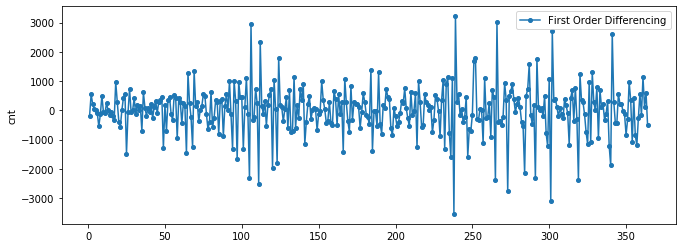

In [66]:
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(firstorder.loc[start:end, 'cnt'], marker='o', markersize=4, linestyle='-',label='First Order Differencing')
ax.set_ylabel('cnt')
ax.legend()

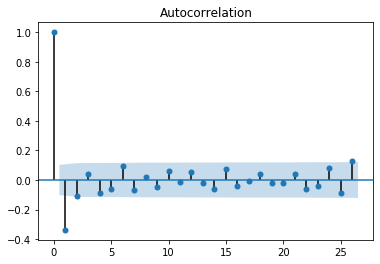

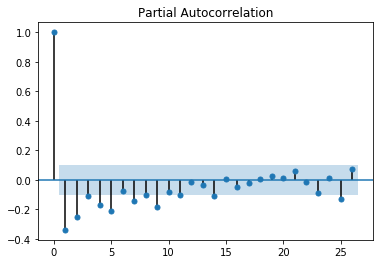

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(firstorder.loc[start:end,'cnt'])
pacf = plot_pacf(firstorder.loc[start:end,'cnt'])

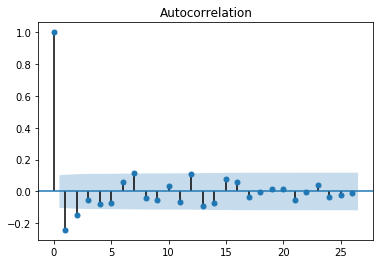

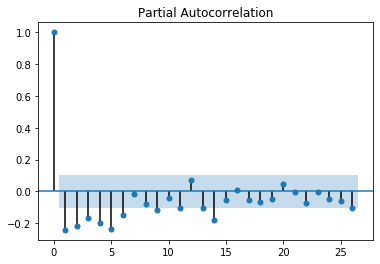

In [68]:
acf = plot_acf(firstorder.loc[start:end,'hum'])
pacf = plot_pacf(firstorder.loc[start:end,'hum'])

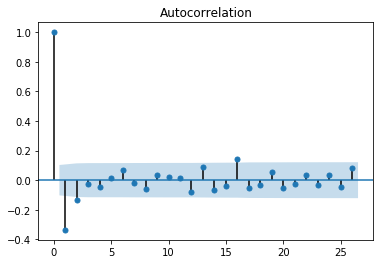

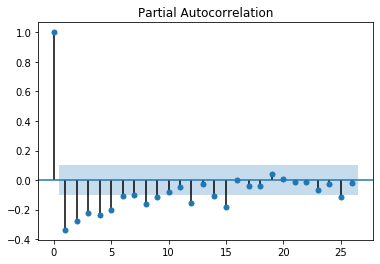

In [69]:
acf = plot_acf(firstorder.loc[start:end,'windspeed'])
pacf = plot_pacf(firstorder.loc[start:end,'windspeed'])

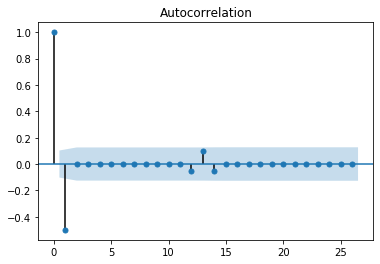

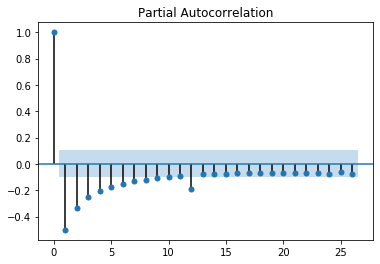

In [70]:
acf = plot_acf(firstorder.loc[start:end,'holiday'])
pacf = plot_pacf(firstorder.loc[start:end,'holiday'])

C:\Users\Xnes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


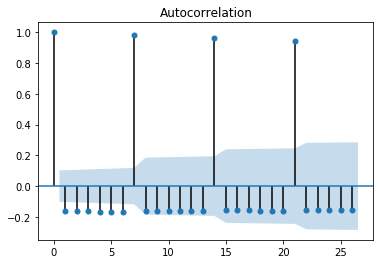

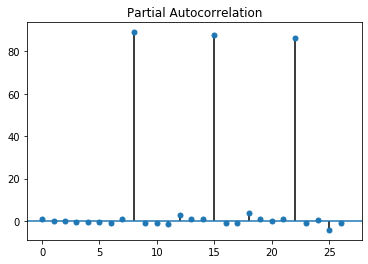

In [71]:
acf = plot_acf(firstorder.loc[start:end,'weekday'])
pacf = plot_pacf(firstorder.loc[start:end,'weekday'])

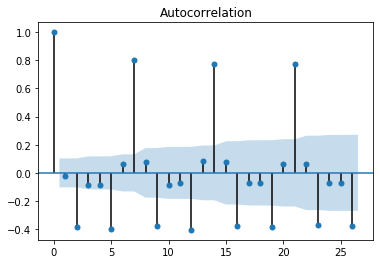

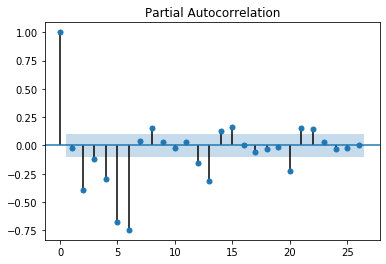

In [72]:
acf = plot_acf(firstorder.loc[start:end,'workingday'])
pacf = plot_pacf(firstorder.loc[start:end,'workingday'])

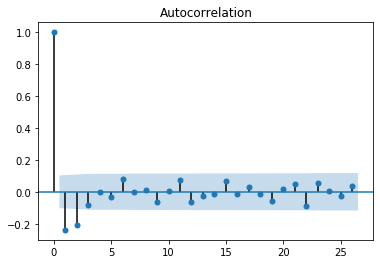

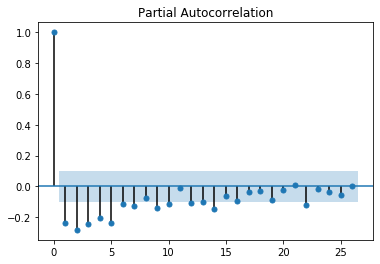

In [73]:
acf = plot_acf(firstorder.loc[start:end,'weathersit'])
pacf = plot_pacf(firstorder.loc[start:end,'weathersit'])

### TS Decomposition

In [74]:
#
#bike.set_index('id',inplace=True)
#bike= bike.set_index(pd.to_datetime(power.Daate+power.Time)
#bike.head()

C:\Users\Xnes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


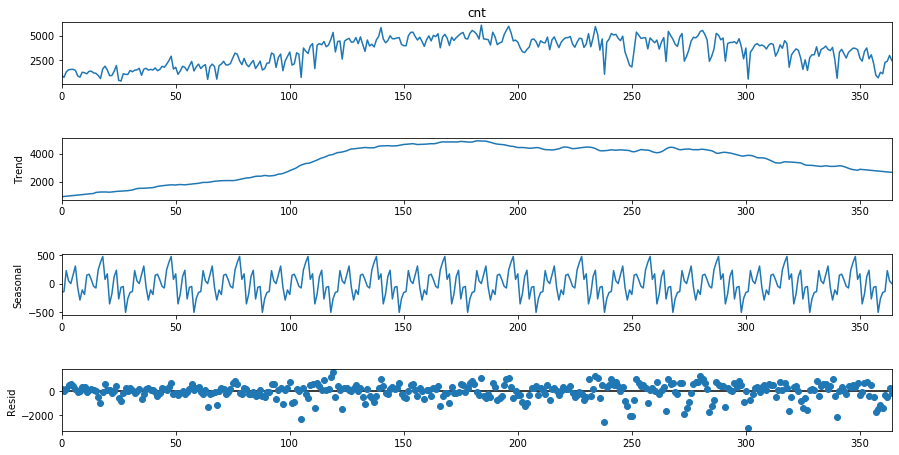

In [77]:
dec = seasonal_decompose(x=bike['cnt'], model='additive', extrapolate_trend='freq',period=30)
fig = dec.plot()
fig.set_size_inches(14,7)
fig.show()

C:\Users\Xnes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


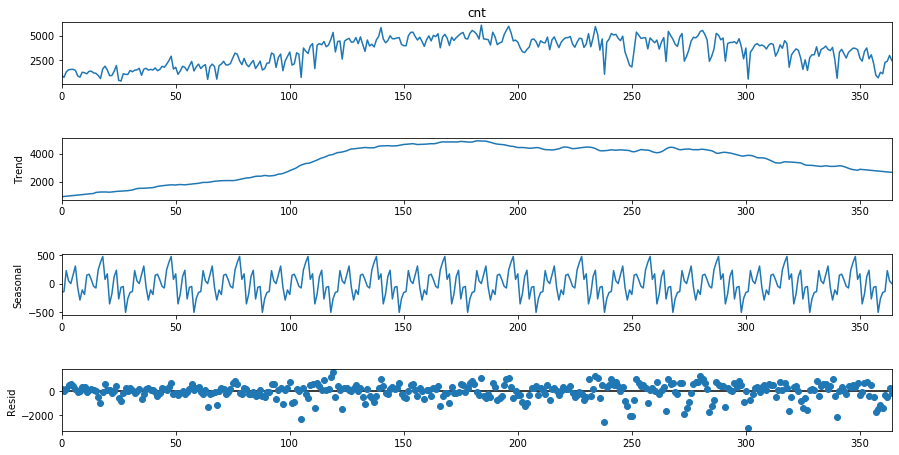

In [78]:
dec = seasonal_decompose(x=bike['cnt'], model='additive', extrapolate_trend='freq',period=30)
fig = dec.plot()
fig.set_size_inches(14,7)
fig.show()

In [79]:
dec.seasonal.head()

0   -155.685003
1   -139.766280
2    224.087059
3     45.766038
4     -0.828059
Name: seasonal, dtype: float64

In [80]:
#it could be a nice adding to the data set
seasonality = dec.seasonal
len(seasonality)

365

In [81]:
bike2=bike

In [89]:
bike2

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0      1       1     1        0        6           0           2  0.344167   
1      2       1     1        0        0           0           2  0.363478   
2      3       1     1        0        1           1           1  0.196364   
3      4       1     1        0        2           1           1  0.200000   
4      5       1     1        0        3           1           1  0.226957   
..   ...     ...   ...      ...      ...         ...         ...       ...   
360  361       1    12        0        2           1           2  0.325000   
361  362       1    12        0        3           1           1  0.299130   
362  363       1    12        0        4           1           1  0.248333   
363  364       1    12        0        5           1           1  0.311667   
364  365       1    12        0        6           0           1  0.410000   

        atemp       hum  windspeed   cnt  seasonality  
0    0.363625  0.805833   0.160446   985  -155.685003  
1    0.353739  0.696087   0.248539   801  -139.766280  
2    0.189405  0.437273   0.248309  1349   224.087059  
3    0.212122  0.590435   0.160296  1562    45.766038  
4    0.229270  0.436957   0.186900  1600    -0.828059  
..        ...       ...        ...   ...          ...  
360  0.327633  0.762500   0.188450  1162  -155.685003  
361  0.279974  0.503913   0.293961  2302  -139.766280  
362  0.263892  0.574167   0.119412  2423   224.087059  
363  0.318812  0.636667   0.134337  2999    45.766038  
364  0.414121  0.615833   0.220154  2485    -0.828059  

[365 rows x 13 columns]

### Run a Vector Autoregression Model (VAR)

In [70]:
cor_res = pd.DataFrame(columns=['var1','var2','lag','correlation','p_value'])
# correlation between cnt and lagged 
for lag in range(1,7):
    cnt = bike['cnt'].iloc[lag:]
    hum = bike['hum'].iloc[:-lag]
    holiday = bike['holiday'].iloc[:-lag]
    temp = bike['temp'].iloc[:-lag]
    weekday = bike['weekday'].iloc[:-lag]
    workingday = bike['workingday'].iloc[:-lag]
    season = bike['season'].iloc[:-lag]
    windspeed = bike['windspeed'].iloc[:-lag]
 

    cor, p_value = pearsonr(cnt,hum)
    cor_res = cor_res.append({'var1':'cnt','var2':'hum','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,holiday)
    cor_res = cor_res.append({'var1':'cnt','var2':'holiday','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,temp)
    cor_res = cor_res.append({'var1':'cnt','var2':'temp','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,weekday)
    cor_res = cor_res.append({'var1':'cnt','var2':'weekday','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,workingday)
    cor_res = cor_res.append({'var1':'cnt','var2':'workingday','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,season)
    cor_res = cor_res.append({'var1':'cnt','var2':'season','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)
    cor, p_value = pearsonr(cnt,windspeed)
    cor_res = cor_res.append({'var1':'cnt','var2':'windspeed','lag':lag,'correlation':cor,'p_value':p_value},ignore_index=True)

In [71]:
cor_res

var1        var2 lag  correlation       p_value
0   cnt         hum   1     0.107142  4.105379e-02
1   cnt     holiday   1    -0.088819  9.062976e-02
2   cnt        temp   1     0.734762  5.439899e-63
3   cnt     weekday   1     0.000236  9.964179e-01
4   cnt  workingday   1     0.020930  6.906363e-01
5   cnt      season   1     0.536513  1.605672e-28
6   cnt   windspeed   1    -0.206829  7.022097e-05
7   cnt         hum   2     0.170276  1.126707e-03
8   cnt     holiday   2    -0.058852  2.634028e-01
9   cnt        temp   2     0.731021  6.847880e-62
10  cnt     weekday   2     0.025075  6.339492e-01
11  cnt  workingday   2    -0.000594  9.910007e-01
12  cnt      season   2     0.527179  2.359026e-27
13  cnt   windspeed   2    -0.158834  2.404983e-03
14  cnt         hum   3     0.169455  1.210525e-03
15  cnt     holiday   3    -0.034504  5.128450e-01
16  cnt        temp   3     0.740809  3.464523e-64
17  cnt     weekday   3     0.047180  3.707531e-01
18  cnt  workingday   3     0.041474  4.314495e-01
19  cnt      season   3     0.514802  6.887994e-26
20  cnt   windspeed   3    -0.167851  1.349219e-03
21  cnt         hum   4     0.195976  1.789448e-04
22  cnt     holiday   4    -0.006137  9.074926e-01
23  cnt        temp   4     0.741013  4.576464e-64
24  cnt     weekday   4    -0.012364  8.149043e-01
25  cnt  workingday   4     0.059189  2.619999e-01
26  cnt      season   4     0.496733  6.848311e-24
27  cnt   windspeed   4    -0.136467  9.430756e-03
28  cnt         hum   5     0.230454  1.001048e-05
29  cnt     holiday   5     0.012337  8.155510e-01
30  cnt        temp   5     0.742948  2.169225e-64
31  cnt     weekday   5    -0.035932  4.967499e-01
32  cnt  workingday   5    -0.001108  9.832861e-01
33  cnt      season   5     0.477007  7.454984e-22
34  cnt   windspeed   5    -0.155796  3.038114e-03
35  cnt         hum   6     0.202075  1.156026e-04
36  cnt     holiday   6     0.041258  4.357786e-01
37  cnt        temp   6     0.743180  2.828761e-64
38  cnt     weekday   6    -0.008377  8.743212e-01
39  cnt  workingday   6    -0.026823  6.124754e-01
40  cnt      season   6     0.459882  3.453259e-20
41  cnt   windspeed   6    -0.152859  3.693278e-03

In [72]:
cor_res.loc[cor_res.p_value<0.05]

var1       var2 lag  correlation       p_value
0   cnt        hum   1     0.107142  4.105379e-02
2   cnt       temp   1     0.734762  5.439899e-63
5   cnt     season   1     0.536513  1.605672e-28
6   cnt  windspeed   1    -0.206829  7.022097e-05
7   cnt        hum   2     0.170276  1.126707e-03
9   cnt       temp   2     0.731021  6.847880e-62
12  cnt     season   2     0.527179  2.359026e-27
13  cnt  windspeed   2    -0.158834  2.404983e-03
14  cnt        hum   3     0.169455  1.210525e-03
16  cnt       temp   3     0.740809  3.464523e-64
19  cnt     season   3     0.514802  6.887994e-26
20  cnt  windspeed   3    -0.167851  1.349219e-03
21  cnt        hum   4     0.195976  1.789448e-04
23  cnt       temp   4     0.741013  4.576464e-64
26  cnt     season   4     0.496733  6.848311e-24
27  cnt  windspeed   4    -0.136467  9.430756e-03
28  cnt        hum   5     0.230454  1.001048e-05
30  cnt       temp   5     0.742948  2.169225e-64
33  cnt     season   5     0.477007  7.454984e-22
34  cnt  windspeed   5    -0.155796  3.038114e-03
35  cnt        hum   6     0.202075  1.156026e-04
37  cnt       temp   6     0.743180  2.828761e-64
40  cnt     season   6     0.459882  3.453259e-20
41  cnt  windspeed   6    -0.152859  3.693278e-03

In [73]:
#This outcome is not muvhak so we dont use it.
cor_res.loc[cor_res.p_value>=0.05]

var1        var2 lag  correlation   p_value
1   cnt     holiday   1    -0.088819  0.090630
3   cnt     weekday   1     0.000236  0.996418
4   cnt  workingday   1     0.020930  0.690636
8   cnt     holiday   2    -0.058852  0.263403
10  cnt     weekday   2     0.025075  0.633949
11  cnt  workingday   2    -0.000594  0.991001
15  cnt     holiday   3    -0.034504  0.512845
17  cnt     weekday   3     0.047180  0.370753
18  cnt  workingday   3     0.041474  0.431450
22  cnt     holiday   4    -0.006137  0.907493
24  cnt     weekday   4    -0.012364  0.814904
25  cnt  workingday   4     0.059189  0.262000
29  cnt     holiday   5     0.012337  0.815551
31  cnt     weekday   5    -0.035932  0.496750
32  cnt  workingday   5    -0.001108  0.983286
36  cnt     holiday   6     0.041258  0.435779
38  cnt     weekday   6    -0.008377  0.874321
39  cnt  workingday   6    -0.026823  0.612475

holiday, workingday,weekday not helping

In [74]:
cor_res.loc[cor_res.lag==1]

var1        var2 lag  correlation       p_value
0  cnt         hum   1     0.107142  4.105379e-02
1  cnt     holiday   1    -0.088819  9.062976e-02
2  cnt        temp   1     0.734762  5.439899e-63
3  cnt     weekday   1     0.000236  9.964179e-01
4  cnt  workingday   1     0.020930  6.906363e-01
5  cnt      season   1     0.536513  1.605672e-28
6  cnt   windspeed   1    -0.206829  7.022097e-05

lag=1 hum,temp,season,windspeed

In [75]:
cor_res.loc[cor_res.lag==2]

var1        var2 lag  correlation       p_value
7   cnt         hum   2     0.170276  1.126707e-03
8   cnt     holiday   2    -0.058852  2.634028e-01
9   cnt        temp   2     0.731021  6.847880e-62
10  cnt     weekday   2     0.025075  6.339492e-01
11  cnt  workingday   2    -0.000594  9.910007e-01
12  cnt      season   2     0.527179  2.359026e-27
13  cnt   windspeed   2    -0.158834  2.404983e-03

#### lag=2
hum,temp,season,windspeed

In [78]:
cor_res.loc[cor_res.lag==6]

var1        var2 lag  correlation       p_value
35  cnt         hum   6     0.202075  1.156026e-04
36  cnt     holiday   6     0.041258  4.357786e-01
37  cnt        temp   6     0.743180  2.828761e-64
38  cnt     weekday   6    -0.008377  8.743212e-01
39  cnt  workingday   6    -0.026823  6.124754e-01
40  cnt      season   6     0.459882  3.453259e-20
41  cnt   windspeed   6    -0.152859  3.693278e-03

###### lag=6
hum,temp,season,windspeed

### Var fitting

In [91]:
varmod = VAR(bike2[['cnt','hum','season','temp','windspeed']])

In [92]:
varfit = varmod.fit(maxlags=14)

In [93]:
varfit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 14, Nov, 2020
Time:                     11:45:36
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -1.33491
Nobs:                     351.000    HQIC:                  -3.68562
Log likelihood:          -1215.67    FPE:                 0.00545397
AIC:                     -5.23970    Det(Omega_mle):      0.00217113
--------------------------------------------------------------------
Results for equation cnt
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const             -1255.118129       665.314488           -1.887           0.059
L1.cnt                0.343117         0.070628            4.858           0.000
L1.hum              -11.175303       402.364278           -0.0

L2,L5,L13: hum
L8:temp

In [94]:
finalvar = varfit.summary()

In [97]:
pval = np.concatenate(finalvar.model.pvalues[0:14]).tolist()
len(pval)

70

In [98]:
len(finalvar.model.exog_names)

71

In [99]:
finalvar.model.exog_names[1:71]

['L1.cnt',
 'L1.hum',
 'L1.season',
 'L1.temp',
 'L1.windspeed',
 'L2.cnt',
 'L2.hum',
 'L2.season',
 'L2.temp',
 'L2.windspeed',
 'L3.cnt',
 'L3.hum',
 'L3.season',
 'L3.temp',
 'L3.windspeed',
 'L4.cnt',
 'L4.hum',
 'L4.season',
 'L4.temp',
 'L4.windspeed',
 'L5.cnt',
 'L5.hum',
 'L5.season',
 'L5.temp',
 'L5.windspeed',
 'L6.cnt',
 'L6.hum',
 'L6.season',
 'L6.temp',
 'L6.windspeed',
 'L7.cnt',
 'L7.hum',
 'L7.season',
 'L7.temp',
 'L7.windspeed',
 'L8.cnt',
 'L8.hum',
 'L8.season',
 'L8.temp',
 'L8.windspeed',
 'L9.cnt',
 'L9.hum',
 'L9.season',
 'L9.temp',
 'L9.windspeed',
 'L10.cnt',
 'L10.hum',
 'L10.season',
 'L10.temp',
 'L10.windspeed',
 'L11.cnt',
 'L11.hum',
 'L11.season',
 'L11.temp',
 'L11.windspeed',
 'L12.cnt',
 'L12.hum',
 'L12.season',
 'L12.temp',
 'L12.windspeed',
 'L13.cnt',
 'L13.hum',
 'L13.season',
 'L13.temp',
 'L13.windspeed',
 'L14.cnt',
 'L14.hum',
 'L14.season',
 'L14.temp',
 'L14.windspeed']

In [100]:
ttest = np.concatenate(finalvar.model.tvalues_endog_lagged[0:14]).tolist()
len(ttest)


70

In [101]:
voltvar = pd.DataFrame({'vars':finalvar.model.exog_names[1:71],'ttest':ttest,'pval':pval})
voltvar

vars     ttest      pval
0          L1.cnt  4.858067  0.059227
1          L1.hum  1.072384  0.004418
2       L1.season  0.357139  0.519878
3         L1.temp  1.533921  0.358433
4    L1.windspeed -0.721744  0.007730
..            ...       ...       ...
65        L14.cnt  1.866447  0.761111
66        L14.hum  0.085817  0.812329
67     L14.season  0.511335  0.604352
68       L14.temp  1.091244  0.709668
69  L14.windspeed  0.484546  0.287412

[70 rows x 3 columns]

In [102]:
voltvar[voltvar.pval<0.05]

vars     ttest          pval
1         L1.hum  1.072384  4.418337e-03
4   L1.windspeed -0.721744  7.729607e-03
5         L2.cnt -0.027774  1.185371e-06
11        L3.hum  0.321742  4.065417e-11
13       L3.temp  0.064186  5.441065e-03
17     L4.season -2.441381  1.971576e-63
22     L5.season  1.322803  1.463119e-02
23       L5.temp -4.845604  5.025974e-45
24  L5.windspeed  4.042218  5.924711e-05
26        L6.hum  1.076503  1.486375e-05
28       L6.temp -1.650952  1.262271e-06
29  L6.windspeed  0.918262  5.294802e-05
35        L8.cnt  0.502225  4.924366e-02
44  L9.windspeed -1.161879  2.228806e-02
48      L10.temp  2.082160  1.416688e-02
53      L11.temp  1.245360  3.732785e-02

In [119]:
#voltvar[abs(voltvar.ttest)>=1]

In [120]:
#voltvar[(voltvar.ttest>=1) & (voltvar.pval<=0.05)]

The following lags seems to be potentially useful for adding to the dataset:
Lags for weekday: 1,3,4,5,6
Lags for season: 2
Lags for windspeed: 2,
Lags for mnth: 3
Lags for weathersit: 6
Lags for hum: 6
Lags for temp: 7


### Adding new variables and testing their effect on models

In [85]:
bike2['seasonality'] = seasonality.tolist()
seasonality

0     -155.685003
1     -139.766280
2      224.087059
3       45.766038
4       -0.828059
          ...    
360   -155.685003
361   -139.766280
362    224.087059
363     45.766038
364     -0.828059
Name: seasonal, Length: 365, dtype: float64

In [104]:
seasonality.describe()

count    365.000000
mean      -0.072401
std      221.403951
min     -501.617527
25%     -155.685003
50%       -0.828059
75%      161.923419
max      470.806078
Name: seasonal, dtype: float64

In [105]:
seasonality.head()

0   -155.685003
1   -139.766280
2    224.087059
3     45.766038
4     -0.828059
Name: seasonal, dtype: float64

In [109]:
len(seasonality)

365

In [108]:
bike2['seasonality'].head()
#biketest['seasonality'].head()

0   -155.685003
1   -139.766280
2    224.087059
3     45.766038
4     -0.828059
Name: seasonality, dtype: float64

In [108]:
bike2['hum_lag1'] = bike2.hum.shift()
bike2['hum_lag3'] = bike2.hum.shift(3)
bike2['hum_lag6'] = bike2.hum.shift(6)

bike2.head()


id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  seasonality  hum_lag1  hum_lag3  \
0  0.363625  0.805833   0.160446   985  -155.685003       NaN       NaN   
1  0.353739  0.696087   0.248539   801  -139.766280  0.805833       NaN   
2  0.189405  0.437273   0.248309  1349   224.087059  0.696087       NaN   
3  0.212122  0.590435   0.160296  1562    45.766038  0.437273  0.805833   
4  0.229270  0.436957   0.186900  1600    -0.828059  0.590435  0.696087   

   hum_lag6  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [111]:
bike2['windspeed_lag1'] = bike2.windspeed.shift()
bike2['windspeed_lag5'] = bike2.windspeed.shift(5)
bike2['windspeed_lag9'] = bike2.windspeed.shift(9)

bike2.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  seasonality  hum_lag1  hum_lag3  \
0  0.363625  0.805833   0.160446   985  -155.685003       NaN       NaN   
1  0.353739  0.696087   0.248539   801  -139.766280  0.805833       NaN   
2  0.189405  0.437273   0.248309  1349   224.087059  0.696087       NaN   
3  0.212122  0.590435   0.160296  1562    45.766038  0.437273  0.805833   
4  0.229270  0.436957   0.186900  1600    -0.828059  0.590435  0.696087   

   hum_lag6  windspeed_lag1  windspeed_lag5  windspeed_lag9  
0       NaN             NaN             NaN             NaN  
1       NaN        0.160446             NaN             NaN  
2       NaN        0.248539             NaN             NaN  
3       NaN        0.248309             NaN             NaN  
4       NaN        0.160296             NaN             NaN

In [112]:
bike2['temp_lag3'] = bike2.temp.shift(3)
bike2['temp_lag5'] = bike2.temp.shift(5)
bike2['temp_lag11'] = bike2.temp.shift(11)

bike2.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  seasonality  hum_lag1  hum_lag3  hum_lag6  \
0  0.363625  0.805833  ...  -155.685003       NaN       NaN       NaN   
1  0.353739  0.696087  ...  -139.766280  0.805833       NaN       NaN   
2  0.189405  0.437273  ...   224.087059  0.696087       NaN       NaN   
3  0.212122  0.590435  ...    45.766038  0.437273  0.805833       NaN   
4  0.229270  0.436957  ...    -0.828059  0.590435  0.696087       NaN   

   windspeed_lag1  windspeed_lag5  windspeed_lag9  temp_lag3  temp_lag5  \
0             NaN             NaN             NaN        NaN        NaN   
1        0.160446             NaN             NaN        NaN        NaN   
2        0.248539             NaN             NaN        NaN        NaN   
3        0.248309             NaN             NaN   0.344167        NaN   
4        0.160296             NaN             NaN   0.363478        NaN   

   temp_lag11  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [113]:
bike2['cnt_lag2'] = bike2.cnt.shift(2)
bike2['cnt_lag8'] = bike2.cnt.shift(8)


bike2.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  hum_lag3  hum_lag6  windspeed_lag1  \
0  0.363625  0.805833  ...       NaN       NaN             NaN   
1  0.353739  0.696087  ...       NaN       NaN        0.160446   
2  0.189405  0.437273  ...       NaN       NaN        0.248539   
3  0.212122  0.590435  ...  0.805833       NaN        0.248309   
4  0.229270  0.436957  ...  0.696087       NaN        0.160296   

   windspeed_lag5  windspeed_lag9  temp_lag3  temp_lag5  temp_lag11  cnt_lag2  \
0             NaN             NaN        NaN        NaN         NaN       NaN   
1             NaN             NaN        NaN        NaN         NaN       NaN   
2             NaN             NaN        NaN        NaN         NaN     985.0   
3             NaN             NaN   0.344167        NaN         NaN     801.0   
4             NaN             NaN   0.363478        NaN         NaN    1349.0   

   cnt_lag8  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 24 columns]

In [116]:
bike2['temp_ratio']=bike2['atemp']/bike2['temp']
bike2.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  hum_lag6  windspeed_lag1  windspeed_lag5  \
0  0.363625  0.805833  ...       NaN             NaN             NaN   
1  0.353739  0.696087  ...       NaN        0.160446             NaN   
2  0.189405  0.437273  ...       NaN        0.248539             NaN   
3  0.212122  0.590435  ...       NaN        0.248309             NaN   
4  0.229270  0.436957  ...       NaN        0.160296             NaN   

   windspeed_lag9  temp_lag3  temp_lag5  temp_lag11  cnt_lag2  cnt_lag8  \
0             NaN        NaN        NaN         NaN       NaN       NaN   
1             NaN        NaN        NaN         NaN       NaN       NaN   
2             NaN        NaN        NaN         NaN     985.0       NaN   
3             NaN   0.344167        NaN         NaN     801.0       NaN   
4             NaN   0.363478        NaN         NaN    1349.0       NaN   

   temp_ratio  
0    1.056537  
1    0.973206  
2    0.964561  
3    1.060610  
4    1.010191  

[5 rows x 25 columns]

In [117]:
bike2['holworkavg']=(bike2['holiday']+bike2['workingday'])/2
bike2.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  windspeed_lag1  windspeed_lag5  windspeed_lag9  \
0  0.363625  0.805833  ...             NaN             NaN             NaN   
1  0.353739  0.696087  ...        0.160446             NaN             NaN   
2  0.189405  0.437273  ...        0.248539             NaN             NaN   
3  0.212122  0.590435  ...        0.248309             NaN             NaN   
4  0.229270  0.436957  ...        0.160296             NaN             NaN   

   temp_lag3  temp_lag5  temp_lag11  cnt_lag2  cnt_lag8  temp_ratio  \
0        NaN        NaN         NaN       NaN       NaN    1.056537   
1        NaN        NaN         NaN       NaN       NaN    0.973206   
2        NaN        NaN         NaN     985.0       NaN    0.964561   
3   0.344167        NaN         NaN     801.0       NaN    1.060610   
4   0.363478        NaN         NaN    1349.0       NaN    1.010191   

   holworkavg  
0         0.0  
1         0.0  
2         0.5  
3         0.5  
4         0.5  

[5 rows x 26 columns]

### Follow-up models

In [109]:
bike2.columns

Index(['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'seasonality'],
      dtype='object')

In [119]:
vn3=['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'seasonality',
       'hum_lag1', 'hum_lag3', 'hum_lag6', 'windspeed_lag1', 'windspeed_lag5',
       'windspeed_lag9', 'temp_lag3', 'temp_lag5', 'temp_lag11', 'cnt_lag2',
       'cnt_lag8', 'temp_ratio', 'holworkavg']

In [116]:
nv2=['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'seasonality']


In [117]:
X_ts = bike2.loc[:,nv2]
y_ts= bike2.cnt

In [118]:
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_ts,y_ts,test_size=0.30,random_state=1)

In [119]:
X_ts.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  seasonality  
0  0.363625  0.805833   0.160446  -155.685003  
1  0.353739  0.696087   0.248539  -139.766280  
2  0.189405  0.437273   0.248309   224.087059  
3  0.212122  0.590435   0.160296    45.766038  
4  0.229270  0.436957   0.186900    -0.828059

In [148]:
X_test_ts.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
354  355       1    12        0        3           1           2  0.428333   
185  186       3     7        0        2           1           1  0.746667   
167  168       2     6        0        5           1           1  0.649167   
175  176       3     6        0        6           0           1  0.695000   
314  315       4    11        1        5           0           1  0.324167   

        atemp       hum  windspeed  seasonality  
354  0.428017  0.858333   0.221400   230.722302  
185  0.696338  0.590417   0.126258   148.713819  
167  0.600383  0.735833   0.143029   368.376911  
175  0.643313  0.483333   0.209571  -268.878627  
314  0.306817  0.446250   0.314675   -47.896655

In [120]:
print(X_train_ts.shape)
print(X_test_ts.shape)
print(y_train_ts.shape)
print(y_test_ts.shape)

(255, 12)
(110, 12)
(255,)
(110,)


In [147]:
#biketest.shape

In [146]:
#biketest.columns

### Linear Model

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(X_train_ts,y_train_ts)
pred_tr = mod1.predict(X_train_ts)

pred_ts = mod1.predict(X_test_ts)

In [150]:
print('r^2 score: %f' % r2_score(y_train_ts,pred_tr))
print('MAE: %f' % mean_absolute_error(y_train_ts,pred_tr))

print('r^2 score: %f' % r2_score(y_test_ts,pred_ts))
print('MAE: %f' % mean_absolute_error(y_test_ts,pred_ts))

r^2 score: 0.769347
MAE: 510.320162
r^2 score: 0.765044
MAE: 491.981173


In [151]:
res2 = pd.DataFrame([{'model':'Linear Regression + Seasonality',
                     'Train R^2':r2_score(y_train_ts,pred_tr),'Train MAE':mean_absolute_error(y_train_ts,pred_tr),
                     'Test R^2':r2_score(y_test_ts,pred_ts),'Test MAE':mean_absolute_error(y_test_ts,pred_ts)}])
res2

model  Train R^2   Train MAE  Test R^2  \
0  Linear Regression + Seasonality   0.769347  510.320162  0.765044   

     Test MAE  
0  491.981173

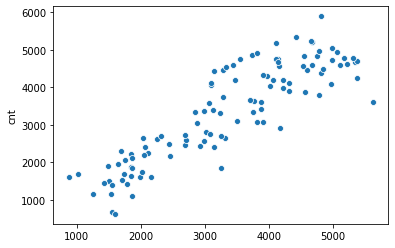

In [152]:
sns.scatterplot(pred_ts, y_test_ts)

In [168]:
pred_ts = mod1.predict(biketest)
pred_ts

array([ 1276.56095457,   587.4826182 ,    90.06750177,  -324.48152458,
         930.54503736,  1158.09278673,  1732.22453504,  1299.08221897,
         276.77553929,   931.11601277,   318.89012008,   954.08884476,
         568.01075697,   599.12049808,   274.33336771,    87.52329494,
         519.71739955,   600.77371418,   476.46424679,   -32.56769299,
        -282.78051807,   -39.56792287,   159.39291642,  1257.44239482,
         905.42790996,   711.86373932,   737.42645856,  1085.46632977,
         900.24191846,   708.37325947,  1136.78883125,  1961.13060207,
         928.71239027,  1152.1678483 ,   377.05098256,   275.88454743,
        1150.0231978 ,  1395.46273673,   348.91784576,   762.34495451,
         434.58108873,  -471.47601909,  -113.56977633,   739.77169685,
         508.45533764,  1135.89072056,   831.96709116,  1154.45757129,
        1253.49743929,   158.93950215,   468.9292604 ,  1021.89908756,
        1326.52598065,  1669.57669984,   613.1792002 ,   455.32446484,
      

In [169]:
df_test4=pd.DataFrame({'id':range(366,732),'cnt':pred_ts})

In [171]:
df_test4.applymap(lambda x: 0 if x<0 else x)

id          cnt
0    366  1276.560955
1    367   587.482618
2    368    90.067502
3    369     0.000000
4    370   930.545037
..   ...          ...
361  727     0.000000
362  728   120.341894
363  729   211.176353
364  730   195.005689
365  731     0.000000

[366 rows x 2 columns]

In [172]:
df_test4.to_csv("results_Linear Regression+Seasonality_Jennie_14112020.csv",index=False)

#### Decision Trees

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
lr = DecisionTreeRegressor()
mod2 = lr.fit(X_train_ts,y_train_ts)
pred2_tr = mod2.predict(X_train_ts)

pred2_ts = mod2.predict(X_test_ts)

In [155]:
res2 = res2.append({'model':'Decision Tree + Seasonality',
                  'Train R^2':r2_score(y_train_ts,pred2_tr),'Train MAE':mean_absolute_error(y_train_ts,pred2_tr),
                  'Test R^2':r2_score(y_test_ts,pred2_ts),'Test MAE':mean_absolute_error(y_test_ts,pred2_ts)
                 },ignore_index=True)
                 
res2

model  Train R^2   Train MAE  Test R^2  \
0  Linear Regression + Seasonality   0.769347  510.320162  0.765044   
1      Decision Tree + Seasonality   1.000000    0.000000  0.757754   

     Test MAE  
0  491.981173  
1  458.400000

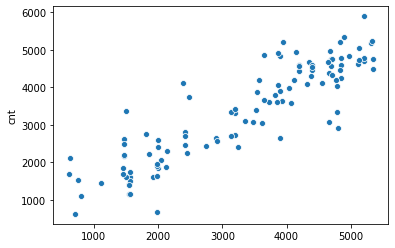

In [156]:
sns.scatterplot(pred2_ts, y_test_ts)

#### Random Forest

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
lr = RandomForestRegressor()
mod3 = lr.fit(X_train_ts,y_train_ts)
pred3_tr = mod3.predict(X_train_ts)

pred3_ts = mod3.predict(X_test_ts)

In [159]:
res2 = res2.append({'model':'Random Forest + Seasonality',
                  'Train R^2':r2_score(y_train_ts,pred3_tr),'Train MAE':mean_absolute_error(y_train_ts,pred3_tr),
                  'Test R^2':r2_score(y_test_ts,pred3_ts),'Test MAE':mean_absolute_error(y_test_ts,pred3_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2  \
0  Linear Regression + Seasonality   0.769347  510.320162  0.765044   
1      Decision Tree + Seasonality   1.000000    0.000000  0.757754   
2      Random Forest + Seasonality   0.979065  141.918235  0.897852   

     Test MAE  
0  491.981173  
1  458.400000  
2  294.012455

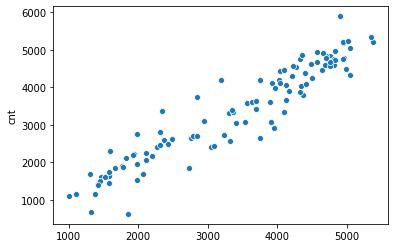

In [160]:
sns.scatterplot(pred3_ts, y_test_ts)

In [161]:
pred_ts = mod3.predict(biketest)
pred_ts

array([1886.08, 1811.19, 2016.78, 2030.94, 2034.4 , 2060.93, 2352.45,
       2151.01, 2119.11, 1888.54, 1880.29, 2246.15, 2040.07, 1902.85,
       1700.78, 1520.61, 2033.28, 2084.62, 1988.91, 1823.32, 1566.81,
       1857.16, 1979.33, 2243.07, 1951.14, 2038.57, 2416.58, 2108.69,
       1948.03, 1896.37, 2049.8 , 4191.38, 2242.34, 2163.05, 1791.39,
       1617.88, 2188.62, 2361.33, 2157.4 , 1854.67, 2014.93, 1679.83,
       1901.58, 2101.43, 2070.47, 2078.5 , 2364.75, 2171.22, 2053.15,
       1697.79, 1546.41, 2108.93, 2246.56, 2899.25, 2256.93, 1809.39,
       2076.56, 2167.8 , 2160.04, 1864.45, 4196.32, 2283.69, 2489.91,
       1993.39, 1836.53, 1886.12, 2208.46, 3136.95, 2111.22, 1864.42,
       1902.99, 3965.67, 4260.57, 4442.35, 4387.24, 2616.4 , 4306.36,
       3698.17, 3988.1 , 4029.4 , 4059.86, 4260.19, 4242.51, 3799.72,
       2587.75, 2732.55, 2487.61, 4515.1 , 4451.31, 2487.52, 2521.89,
       2766.63, 2860.84, 4320.74, 4610.62, 2956.78, 2462.31, 2886.71,
       4501.45, 3296

In [162]:
df_test3=pd.DataFrame({'id':range(366,732),'cnt':pred_ts})

In [164]:
df_test3.to_csv("results_Random Forest+Seasonality_Jennie_14112020.csv",index=False)

#### AdaBoost

In [165]:
from sklearn.ensemble import AdaBoostRegressor

In [166]:
lr = AdaBoostRegressor()
mod4 = lr.fit(X_train_ts,y_train_ts)
pred4_tr = mod4.predict(X_train_ts)

pred4_ts = mod4.predict(X_test_ts)

In [167]:
res2 = res.append({'model':'AdaBoost+Seasonality',
                  'Train R^2':r2_score(y_train_ts,pred4_tr),'Train MAE':mean_absolute_error(y_train_ts,pred4_tr),
                  'Test R^2':r2_score(y_test_ts,pred4_ts),'Test MAE':mean_absolute_error(y_test_ts,pred4_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.756605  519.888702  0.747915  505.722284
1                 Decision Tree   1.000000    0.000000  0.733500  479.100000
2                 Random Forest   0.977364  148.686314  0.878525  331.294273
3                      AdaBoost   0.881485  401.328520  0.841104  408.322786
4     Gradient Boosting Machine   0.971990  183.098505  0.875946  352.382960
5          AdaBoost+Seasonality   0.998761   34.939583  0.998501   38.667769
6          AdaBoost+Seasonality   0.896466  374.681391  0.836832  392.110163
7          AdaBoost+Seasonality   0.896466  374.681391  0.836832  392.110163
8          AdaBoost+Seasonality   0.899384  376.266414  0.832836  411.791997
9          AdaBoost+Seasonality   0.895848  380.953793  0.839420  402.944426

In [133]:
pred_ts = mod4.predict(biketest)
pred_ts

array([1855.225     , 1983.76086957, 2026.36764706, 1943.81578947,
       1833.72222222, 2026.36764706, 2309.22222222, 2189.08196721,
       1862.52941176, 1943.81578947, 1538.39473684, 2118.        ,
       2057.83333333, 1943.81578947, 1833.72222222, 1588.2       ,
       2026.36764706, 2026.36764706, 1943.81578947, 1912.2       ,
       1588.2       , 1943.81578947, 1855.225     , 1943.81578947,
       1833.72222222, 1983.76086957, 2461.63265306, 2246.90909091,
       1943.81578947, 1833.72222222, 1862.52941176, 4508.04504505,
       2433.6875    , 2057.83333333, 1565.78125   , 1538.39473684,
       2026.36764706, 2189.08196721, 1855.225     , 1833.72222222,
       1912.2       , 1862.52941176, 2026.36764706, 1943.81578947,
       1943.81578947, 1943.81578947, 2309.22222222, 2246.90909091,
       2057.83333333, 1791.96969697, 1588.2       , 2026.36764706,
       2309.22222222, 2938.56976744, 2309.22222222, 1791.96969697,
       2026.36764706, 2118.        , 2026.36764706, 1855.225  

In [134]:
df_test2=pd.DataFrame({'id':range(366,732),'cnt':pred_ts})

In [135]:
df_test2.to_csv("results_AdaBoost+Seasonality_Jennie_14112020.csv",index=False)

#### Gradient Boosting

In [173]:
from sklearn.ensemble import GradientBoostingRegressor

In [174]:
lr = GradientBoostingRegressor()
mod5 = lr.fit(X_train_ts,y_train_ts)
pred5_tr = mod5.predict(X_train_ts)

pred5_ts = mod5.predict(X_test_ts)

In [175]:
res2 = res2.append({'model':'Gradient Boosting Machine + Seasonality',
                  'Train R^2':r2_score(y_train_ts,pred5_tr),'Train MAE':mean_absolute_error(y_train_ts,pred5_tr),
                  'Test R^2':r2_score(y_test_ts,pred5_ts),'Test MAE':mean_absolute_error(y_test_ts,pred5_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2  \
0              Linear Regression - Baseline   0.756605  519.888702  0.747915   
1                             Decision Tree   1.000000    0.000000  0.733500   
2                             Random Forest   0.977364  148.686314  0.878525   
3                                  AdaBoost   0.881485  401.328520  0.841104   
4                 Gradient Boosting Machine   0.971990  183.098505  0.875946   
5                      AdaBoost+Seasonality   0.998761   34.939583  0.998501   
6                      AdaBoost+Seasonality   0.896466  374.681391  0.836832   
7                      AdaBoost+Seasonality   0.896466  374.681391  0.836832   
8                      AdaBoost+Seasonality   0.899384  376.266414  0.832836   
9                      AdaBoost+Seasonality   0.895848  380.953793  0.839420   
10  Gradient Boosting Machine + Seasonality   0.981210  152.559052  0.892109   

      Test MAE  
0   505.722284  
1   479.100000  
2   331.294273  
3   408.322786  
4   352.382960  
5    38.667769  
6   392.110163  
7   392.110163  
8   411.791997  
9   402.944426  
10  314.633605

In [176]:
pred_ts = mod5.predict(biketest)
pred_ts

array([1481.38141543, 1497.87485005, 1837.32465198, 2038.95586012,
       2000.78333146, 2161.52665506, 2443.05853083, 2254.73594599,
       2130.30534008, 1970.98745373, 1749.17584311, 2145.18499376,
       1898.86491992, 1734.72007587, 1420.63456949, 1232.66204184,
       1626.59697053, 1904.98642803, 2059.17223596, 1720.06116247,
       1232.78727311, 1550.09393794, 1445.62608791, 2500.21004325,
       1545.91855576, 2429.86441277, 2104.20001521, 2363.1439601 ,
       1777.73611208, 1711.67295642, 2229.16332584, 4259.58601459,
       2222.41859635, 2500.93819908, 1917.61223172, 1126.87529797,
       2042.9909757 , 2551.18889999, 2139.94848425, 1732.59647584,
       2049.30290531, 1355.40342169, 1455.67883245, 1954.93366716,
       2214.26079619, 2150.93921077, 2624.57730721, 2558.42419675,
       2295.85184353, 1476.66747116, 1311.08215766, 2074.84822878,
       2597.83643492, 3300.6433345 , 2135.79559522, 1311.04660729,
       1845.02822865, 2463.6324267 , 2457.82760901, 1790.16345

In [178]:
df_test5=pd.DataFrame({'id':range(366,732),'cnt':pred_ts})

In [179]:
df_test5.to_csv("results_Gradient Boosting Machine+Seasonality_Jennie_14112020.csv",index=False)